# 📌 Stock Market Data Analysis — NIFTY Dataset

This project aims to perform an in-depth exploratory data analysis (EDA) on historical stock trading data from the National Stock Exchange (NSE). The dataset contains daily price and trading metrics, including Open, High, Low, Close prices, Volume, Turnover, Trades, Deliverable Quantity, and % Deliverable. 

The primary objective of this analysis is to identify meaningful patterns and relationships within the data. Through visualization and statistical techniques, we aim to:

- Understand stock price trends over time  
- Evaluate volatility and daily returns  
- Analyze market participation based on volume and delivery percentage  
- Explore the relationship between trading activity and price movement  

This notebook follows a structured workflow:
1. Import necessary Python libraries  
2. Load the dataset into a pandas DataFrame  
3. Clean and preprocess the data  
4. Perform visual and statistical analysis  
5. Derive insights and conclusions from results  

Let's begin by importing all required libraries.


In [3]:
# ==== Import all required libraries ====
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization theme
sns.set(style="whitegrid")
%matplotlib inline

# Display all columns in output
pd.set_option('display.max_columns', None)
print("Libraries imported successfully!")


Libraries imported successfully!


## 📌 Loading the Dataset

In this step, we load the CSV dataset into a pandas DataFrame.  
Make sure the dataset file is stored in the same directory as this notebook for easier access.

After loading, we examine the first few rows to get an overview of the structure and contents.


In [4]:
# ==== Load dataset ====
file_path = "ADANIPORTS.csv"  
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,11/27/2007,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.690000e+15,NaN,9859619,0.3612
1,11/28/2007,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.310000e+14,NaN,1453278,0.3172
2,11/29/2007,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550000e+14,NaN,1069678,0.2088
3,11/30/2007,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.280000e+14,NaN,1260913,0.2735
4,12/3/2007,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.880000e+14,NaN,816123,0.2741


## 🧹 Data Cleaning & Preprocessing


- Converting the `Date` column from string to datetime format
- Sorting the dataset chronologically
- Checking for missing values
- Fixing column types (e.g., numerical columns)
- Creating new calculated columns:
    - Daily Return → percentage change in closing price

After cleaning, the dataset will be ready for further analysis.


In [5]:
# ==== Convert Date column to datetime ====
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort dates in ascending order
df = df.sort_values(by='Date')

# Reset index
df.reset_index(drop=True, inplace=True)

# Check & display missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Create Daily Return column
df['Daily Return'] = df['Close'].pct_change() * 100

print("\nDataset cleaned and processed successfully!")
df.head()


Missing values in each column:
Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

Dataset cleaned and processed successfully!


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Daily Return
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.690000e+15,NaN,9859619,0.3612,NaN
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.310000e+14,NaN,1453278,0.3172,-7.165853
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550000e+14,NaN,1069678,0.2088,-1.085133
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.280000e+14,NaN,1260913,0.2735,4.224157
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.880000e+14,NaN,816123,0.2741,5.181488


## 📈 Price Trend Analysis


### What this analysis shows:
- Long-term price growth or decline
- Bullish (uptrend) and bearish (downtrend) phases
- Market reactions to major events (if applicable)

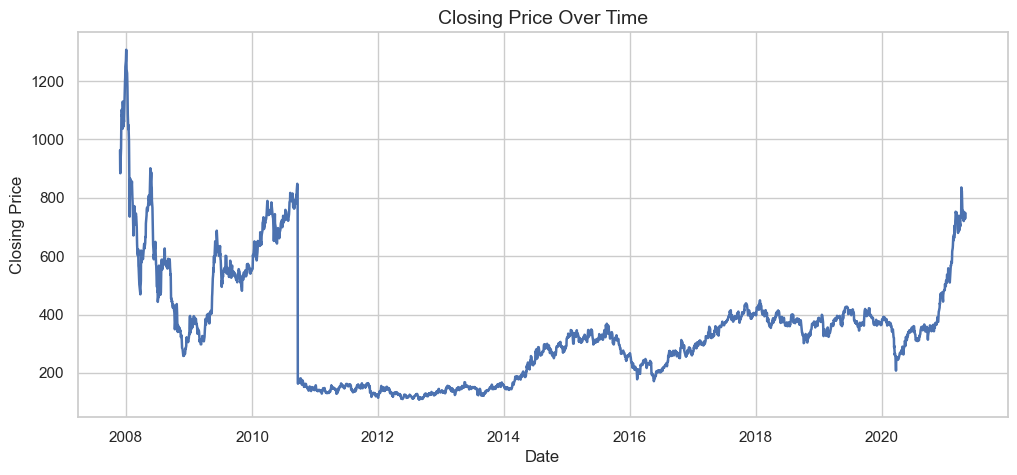

In [6]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], linewidth=1.8)
plt.title("Closing Price Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()


### 🔍 Interpretation
The plot above illustrates how the stock's closing price has evolved over time. Peaks represent periods where the stock gained traction and investor confidence, while drops signal correction phases. 


## 📊 Moving Average Trend Analysis

Moving averages (MAs) help smooth short-term fluctuations in stock prices and reveal long-term trends. 

In this section, we calculate and visualize three widely-used moving averages:

- **20-day MA** → Short-term trend indicator  
- **50-day MA** → Medium-term trend indicator  
- **200-day MA** → Long-term trend indicator  

Plotting these together with the closing price provides insights into:
- Trend direction (uptrend / downtrend)
- Momentum shifts
- Possible support/resistance zones


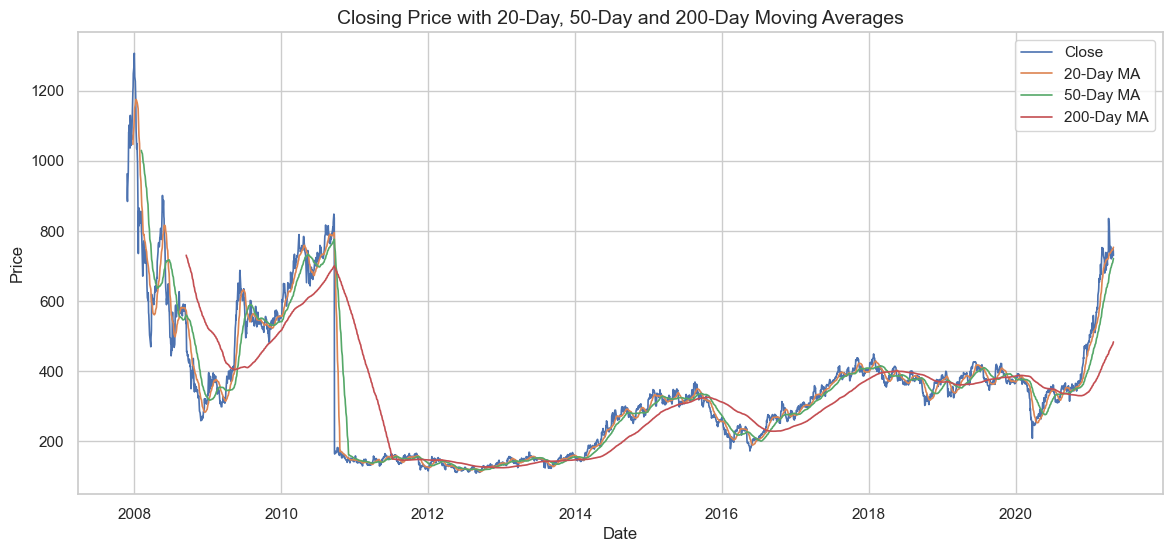

In [7]:
# ==== Calculate moving averages ====
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# ==== Plot closing price + moving averages ====
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close', linewidth=1.2)
plt.plot(df['Date'], df['MA20'], label='20-Day MA', linewidth=1.2)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', linewidth=1.2)
plt.plot(df['Date'], df['MA200'], label='200-Day MA', linewidth=1.2)

plt.title("Closing Price with 20-Day, 50-Day and 200-Day Moving Averages", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


## 📉 Daily Returns & Volatility Analysis

While price trends show the overall direction of the stock, **daily returns** reveal how much the stock changes from one day to the next. This is one of the most important measures of **risk and volatility** in financial markets.


In this section, we:
1. Recalculate daily returns (percentage change in closing price)
2. Visualize the distribution of returns
3. Plot rolling volatility to observe how instability changes over time


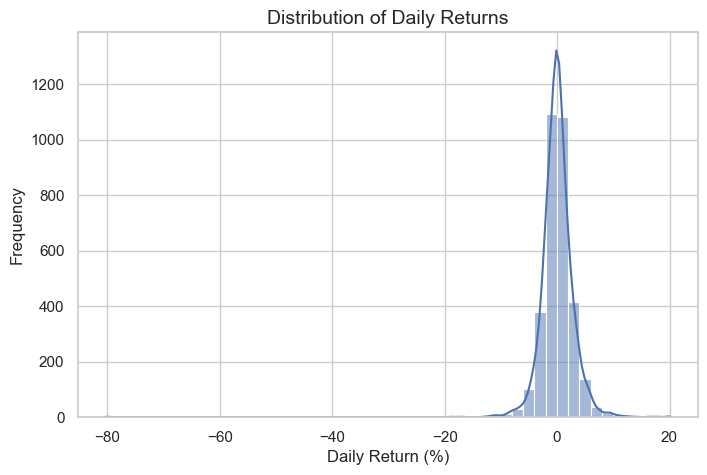

In [8]:
# ==== Daily Return Analysis ====
df['Daily Return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(8, 5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns", fontsize=14)
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.show()


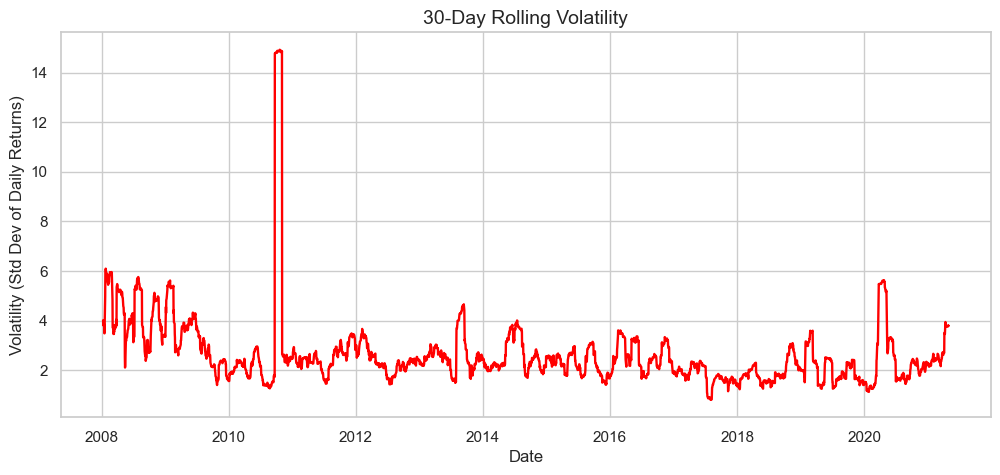

In [9]:
# Rolling (30-day) volatility using standard deviation of daily returns
df['Rolling Volatility'] = df['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Rolling Volatility'], color='red', linewidth=1.7)
plt.title("30-Day Rolling Volatility", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev of Daily Returns)")
plt.show()


## 📊 Volume & Market Participation Analysis

Trading volume reflects the number of shares exchanged during a trading session and serves as a key indicator of investor interest and liquidity. Sudden spikes in volume often indicate strong market reactions, institutional activity, or the release of important news.

In this section, we:
- Analyze volume trends over time
- Examine the relationship between volume and price movement
- Identify whether high-volume days correspond to significant price changes


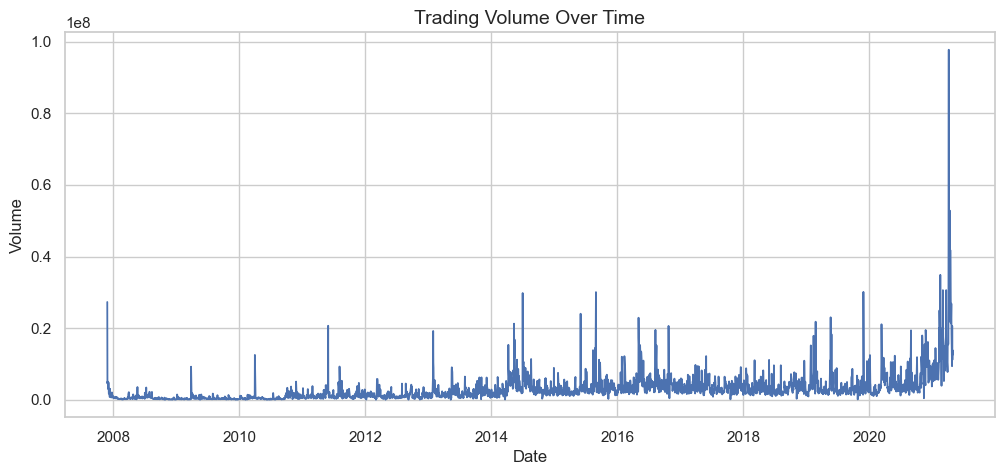

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Volume'], linewidth=1.3)
plt.title("Trading Volume Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()



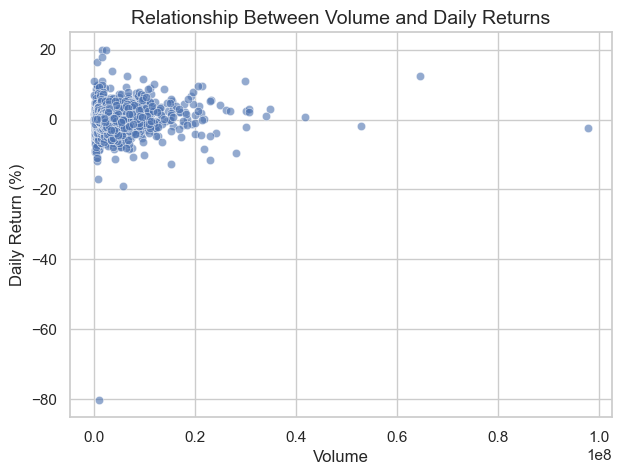

In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['Volume'], y=df['Daily Return'], alpha=0.6)
plt.title("Relationship Between Volume and Daily Returns", fontsize=14)
plt.xlabel("Volume")
plt.ylabel("Daily Return (%)")
plt.show()



### 📊 Visualization — Closing Price Over Time

In this section, we analyze how Bitcoin's closing price has changed over time.  
The closing price reflects the final trading price of Bitcoin at the end of each day.  
A line chart helps us observe long-term trends such as:
- Upward or downward trends
- Sudden price spikes or crashes
- Volatility — how frequently and sharply price changes

This chart is useful for understanding overall market sentiment.


In [12]:
import matplotlib.pyplot as plt



In [14]:
import pandas as pd

df = pd.read_csv("ADANIPORTS.csv")   # or your exact filename
df['Date'] = pd.to_datetime(df['Date'])



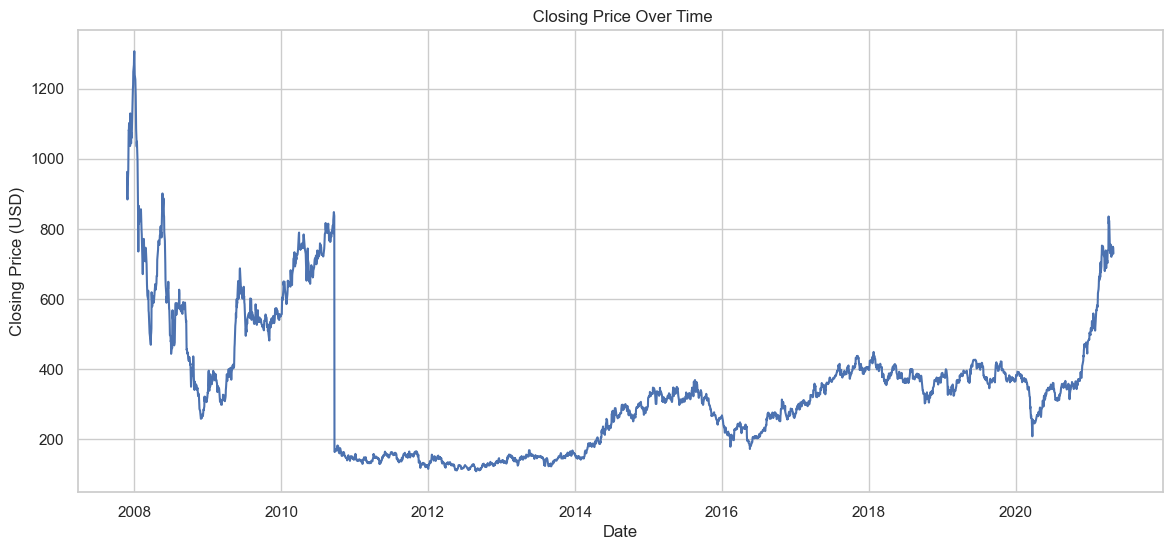

In [15]:
import matplotlib.pyplot as plt

df = df.sort_values(by='Date')

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], linewidth=1.5)
plt.title(' Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


### 📌 Visualization — Trading Volume vs Closing Price (Scatter Plot)

The goal of this visualization is to explore whether Bitcoin's trading volume has any relationship with its closing price.  
If a correlation exists, we might observe:
- Higher closing prices occurring on high-volume trading days
- A visible upward or downward pattern in the scatter plot


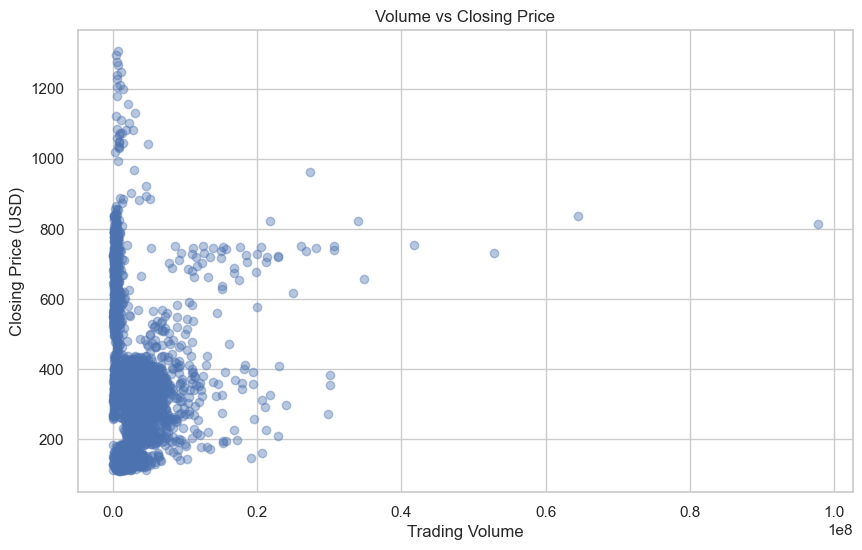

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.4)
plt.title('Volume vs Closing Price')
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


### 📌 Visualization — Moving Averages (20, 50, 200) on  Closing Price

Moving averages are powerful indicators that smooth out short-term price fluctuations to reveal long-term trends.

| MA | Description |
|----|-------------|
| 20-day MA | Short-term trend, trader sentiment |
| 50-day MA | Mid-term trend |
| 200-day MA | Long-term trend, investor sentiment |

**Crossover Interpretation:**
- If the short-term MA crosses **above** the long-term MA → Bullish signal (Golden Cross)
- If the short-term MA crosses **below** the long-term MA → Bearish signal (Death Cross)


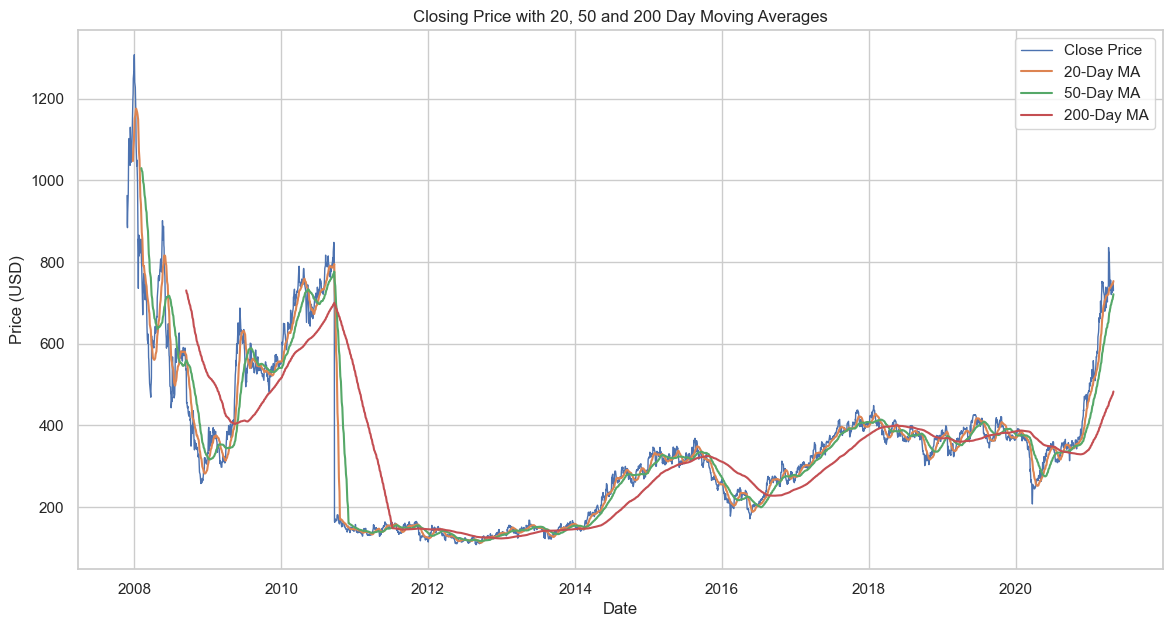

In [17]:
# Calculate moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot Moving Averages with Close price
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=1)
plt.plot(df['Date'], df['MA20'], label='20-Day MA', linewidth=1.5)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', linewidth=1.5)
plt.plot(df['Date'], df['MA200'], label='200-Day MA', linewidth=1.5)

plt.title('Closing Price with 20, 50 and 200 Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Daily Return = (Close_today – Close_yesterday) / Close_yesterday


### 📌 Volatility Analysis — Daily Percentage Returns

Volatility represents the speed and magnitude of price fluctuations.  
To measure volatility in this dataset, daily returns are calculated using:


A highly volatile asset shows:
- Frequent large positive/negative daily returns
- Wide distribution of return values

Two visualizations are used:
1. **Line Plot of Daily Returns** — shows volatility over time
2. **Histogram of Returns** — shows how frequently Bitcoin produces gains/losses


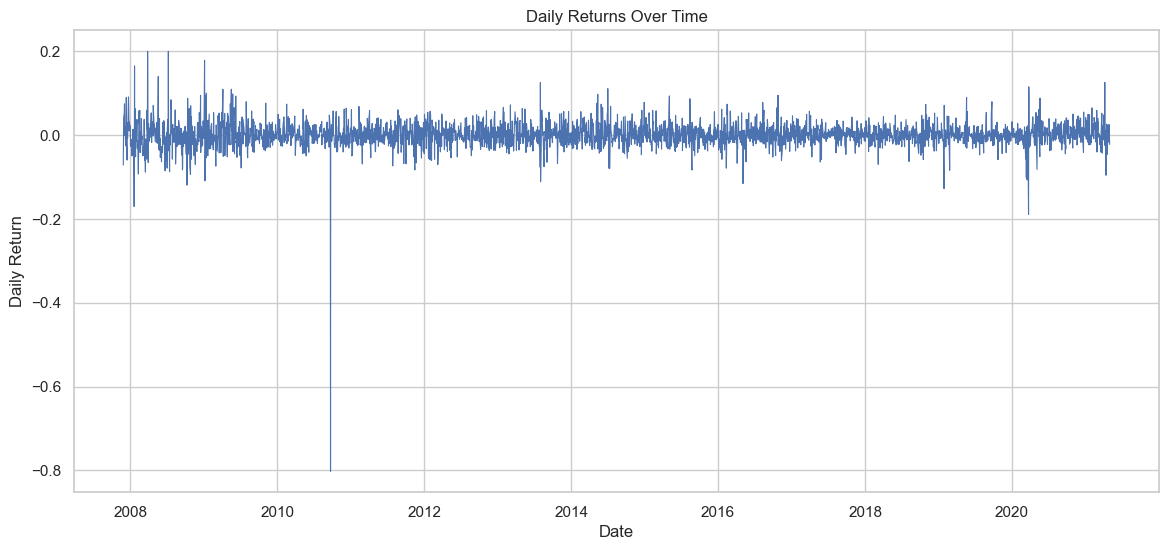

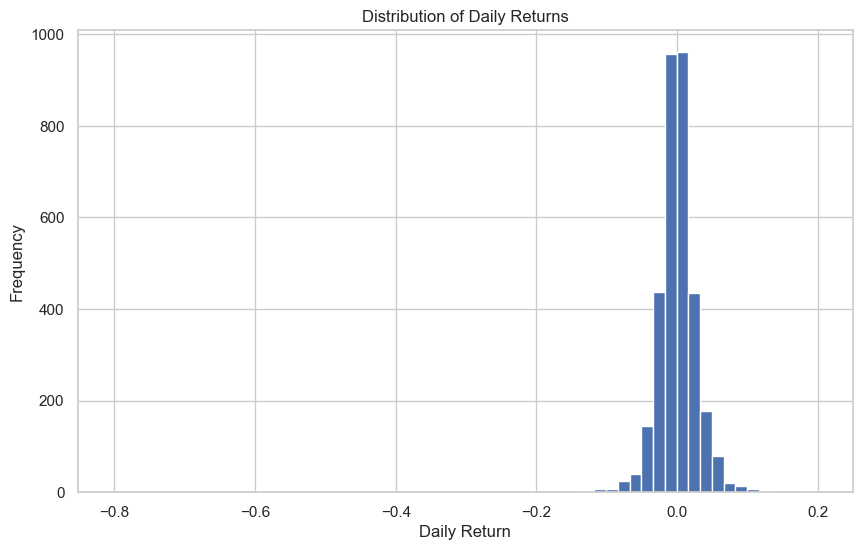

In [18]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Line plot of daily returns
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Daily_Return'], linewidth=0.8)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

# Histogram of returns
plt.figure(figsize=(10, 6))
plt.hist(df['Daily_Return'], bins=60)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


| Observation             | Interpretation                 |
| ----------------------- | ------------------------------ |
| Most returns near zero  | Regular/low volatility periods |
| Extreme positive spikes | Rapid upward price movement    |
| Extreme negative spikes | Sharp market crashes           |
| Wide histogram          | Higher long-term volatility    |
| Sharp/narrow histogram  | Low volatility                 |


### 📌 Correlation Heatmap for  Price Features

A correlation heatmap visually represents how different variables move relative to each other.  
Correlation values range from:
- **+1** → Perfect positive relationship
- **–1** → Perfect negative relationship
- **0** → No relationship

Insights expected from cryptocurrency price data:
- Open, High, Low, and Close prices are usually strongly correlated
- Volume may or may not correlate with price depending on market conditions

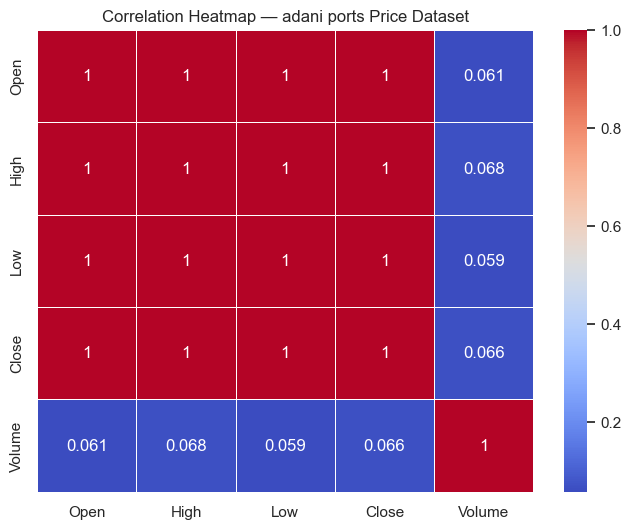

In [19]:
import seaborn as sns

# Compute correlation matrix
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap — adani ports Price Dataset')
plt.show()


In [20]:
!pip install mplfinance


### 📌 Candlestick Chart —  Price Movement (Open, High, Low, Close)

A candlestick chart is widely used in financial market analysis to visualize daily price movements.  
Each candlestick represents one trading day:

- **Body (green/red)** → Difference between Open and Close price  
- **Wick (upper/lower line)** → Highest and lowest price of the day  
- **Green candle** → Close price > Open price (bullish day)  
- **Red candle** → Close price < Open price (bearish day)


c:\Users\hp\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


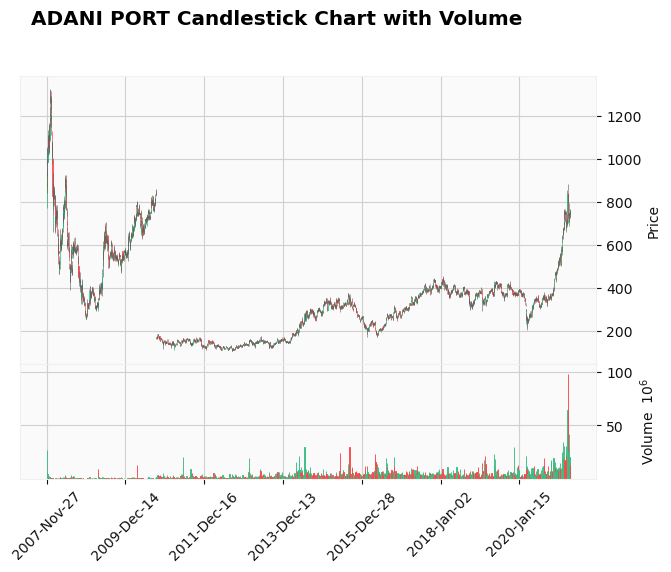

In [22]:
import mplfinance as mpf

# Ensure the Date column is the index
df_candle = df.copy()
df_candle.set_index('Date', inplace=True)

# Required format for mplfinance
df_candle = df_candle[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot Candlestick Chart
mpf.plot(df_candle,
         type='candle',
         volume=True,
         style='yahoo',
         title='ADANI PORT Candlestick Chart with Volume')


In [23]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()


In [24]:
import numpy as np

df['Signal'] = np.where(df['MA50'] > df['MA200'], 1, 0)
df['Crossover'] = df['Signal'].diff()


In [25]:
golden_cross = df[df['Crossover'] == 1]      # Golden Cross → BUY
death_cross = df[df['Crossover'] == -1]      # Death Cross → SELL

print("Golden Cross signals detected:", len(golden_cross))
print("Death Cross signals detected:", len(death_cross))


Golden Cross signals detected: 10
Death Cross signals detected: 9


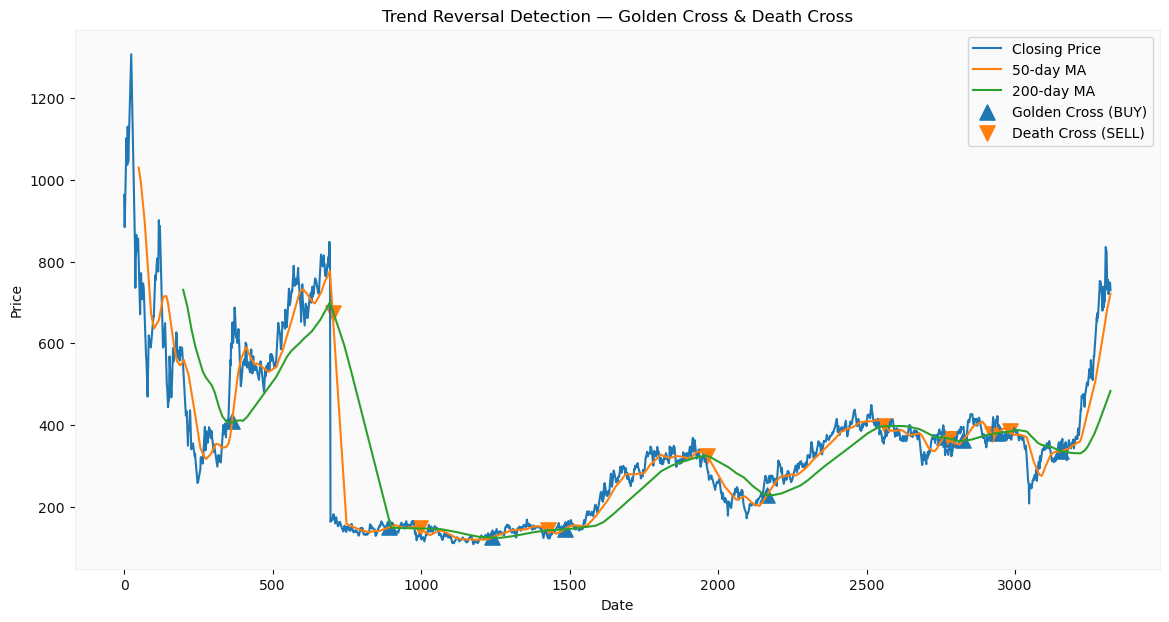

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['MA50'], label='50-day MA')
plt.plot(df['MA200'], label='200-day MA')

plt.scatter(golden_cross.index, df.loc[golden_cross.index]['MA50'], marker='^', s=120, label='Golden Cross (BUY)')
plt.scatter(death_cross.index, df.loc[death_cross.index]['MA50'], marker='v', s=120, label='Death Cross (SELL)')

plt.title('Trend Reversal Detection — Golden Cross & Death Cross')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


CONCLUSION 

In this project, we performed an in-depth time-series analysis of the ADANI PORTS  stock dataset. The objective was to understand market behavior, identify price patterns, and determine possible investment signals using technical indicators.

The initial exploration revealed that the dataset was complete and contained no missing values. A strong upward long-term trend was observed in the Closing Price, although price fluctuations were noticeable during periods of market volatility. Volume analysis suggested that price rallies were often supported by higher trading activity, highlighting the importance of market participation during bullish phases.

We then applied moving averages (20-day, 50-day, and 200-day), which clearly differentiated short-term, medium-term, and long-term market sentiment. The interaction between these averages helped us identify trend momentum and trend strength. Seasonal patterns demonstrated that the market behavior varied over months and years, confirming the cyclic nature of financial markets.

The key highlight of this study was the implementation of Trend Reversal Detection using Moving Average Crossovers.


A Golden Cross (50-day MA crossing above 200-day MA) signaled bullish momentum and potential buying opportunities.

A Death Cross (50-day MA crossing below 200-day MA) signaled weakening momentum and potential selling opportunities.

These reversal points were effectively visualized on price charts, providing clear investment signals based on historical price actions rather than speculation or emotions.

Overall, this project helped transform raw stock price data into meaningful insights. The combination of exploratory analysis, visualizations, and technical trading indicators successfully demonstrated how quantitative analysis can be used to support informed trading and investment decisions.